# Optimize Marketing Expenses

You've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

# Step 1
Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.

In [56]:
#import pandas and other important libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

warnings.filterwarnings('ignore')

In [57]:
#read all input data and assign each dataset to a variable

#after looking into specifically visits_log_us, we can see there are a lot of optimization using .info(). We apply conversion
#in the read csv for less clutter
try:
    visits = pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])

try:
    orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])

try:
    costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
except:
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [58]:
#doing visits.info to see what data we're working with, and finding it's 13.7+ MB in it's default state
#we can also see that end ts and start ts can be converted to datetime
#visits.info()

#doing value_counts to see what types of devices there are, we can put them under category
#visits['Device'].value_counts()

#after applying conversion in pd.read_csv, we can see datetime, category, and memory usage changed. It is now 11.3 MB compared 
#to 13.7+ MB

# Sort visits by "End Ts" and "Uid" before it's used
visits.sort_values(by=['End Ts', 'Uid'], ascending=[1,1])
visits.info()
visits.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Please, pay attention to data frame formatting in your project. Don't forget to use head(), tail(), or sample() when outputting large tables. If you leave everything "as is", when you save the project to github, all the tables will expand to their full length and take up most of the project. Plus, the jupyter notebook wastes extra resources when loading such tables. 
</div>

In [59]:
#checking to see what datatypes should be replaced, Buy Ts should be datetime. Will be replaced in the initial data import
orders.info()

#double checking if the conversion worked
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [60]:
#checking to see what datatypes should be replaced, dt should be datetime. Will be replaced in the initial data import
costs.info()

#double checking if the conversion worked
costs.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


# Step 1 conclusion

I was able to optimize the data, and convert some columns to the correct datatype. 

This included converting start ts, end ts, and dt to datetime. I also converted dtype on device to category to save more memory on the table

# Step 2

Product
 - How many people use it every day, week, and month?
 - How many sessions are there per day? 
 - What is the length of each session?
 - How often do users come back?

Sales
 - When do people start buying?
 - How many orders do they make during a given period of time?
 - What is the average purchase size?
 - How much money do they bring(LTV)

Marketing
 - How much money was spent? Overall/per source/over time
 - How much did customer acquisition from each of the sources cost?
 - How worthwhile were the investments? (ROI)

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time

### How many people use it every day, week, and month? (Finding DAU, WAU, MAU)

In [61]:
#make new columns for date, week, and month
visits['event_date'] = visits['Start Ts'].astype('datetime64[D]')
visits['event_week'] = visits['Start Ts'].astype('datetime64[W]')
visits['event_month'] = visits['Start Ts'].astype('datetime64[M]')

#double checking to see if everything is correct
visits.info()
visits.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
Device         359400 non-null category
End Ts         359400 non-null datetime64[ns]
Source Id      359400 non-null int64
Start Ts       359400 non-null datetime64[ns]
Uid            359400 non-null uint64
event_date     359400 non-null datetime64[ns]
event_week     359400 non-null datetime64[ns]
event_month    359400 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](5), int64(1), uint64(1)
memory usage: 19.5 MB


,Device,End Ts,Source Id,Start Ts,Uid,event_date,event_week,event_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01


In [62]:
#calculating DAU, WAU, and MAU
dau_total = visits.groupby('event_date').agg({"Uid": 'nunique'}).mean().round()
wau_total = visits.groupby('event_week').agg({"Uid": 'nunique'}).mean().round()
mau_total = visits.groupby('event_month').agg({"Uid": 'nunique'}).mean().round()

print('Number of visits per day is:', int(dau_total), 'users')
print('Number of visits per week is:', int(wau_total), 'users')
print('Number of visits per month is:', int(mau_total), 'users')

Number of visits per day is: 908 users
Number of visits per week is: 5724 users
Number of visits per month is: 23228 users


### Conclusion 

As we can see, there are 908 daily active users, 5724 weekly, and 23228 monthly.

### How many sessions are there per day?

In [63]:
#doing a groupby event_date so we can find how many users go on each day.
sessions_per_day = visits.groupby('event_date').agg({'Start Ts':'count'}).mean().round()
print('The number of sessions per day is: ', int(sessions_per_day))

The number of sessions per day is:  987


### What is the length of each session

In [64]:
#calculating the length of each session by doing End Ts - Start Ts and outputting as seconds on a new column under Length
visits['length_of_visits_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

print('Average length of each session is ', visits['length_of_visits_sec'].mode(), 'seconds')
visits.head(15)

Average length of each session is  0    60
dtype: int64 seconds


,Device,End Ts,Source Id,Start Ts,Uid,event_date,event_week,event_month,length_of_visits_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018-01-25,2018-01-01,3360
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11-02,2017-11-01,60
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07-13,2017-07-01,180
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11-02,2017-11-01,60


### Meaning of the results

From the table, we can see that in length of each visit in seconds. We can also see from the use of .mode, 0 seconds and 60 are the most appearing. Something isn't right.

### How often do users come back?

% of users that come back in the next month:  6.516659710392834
% of users that come back at the end of the year:  4.495059959272947


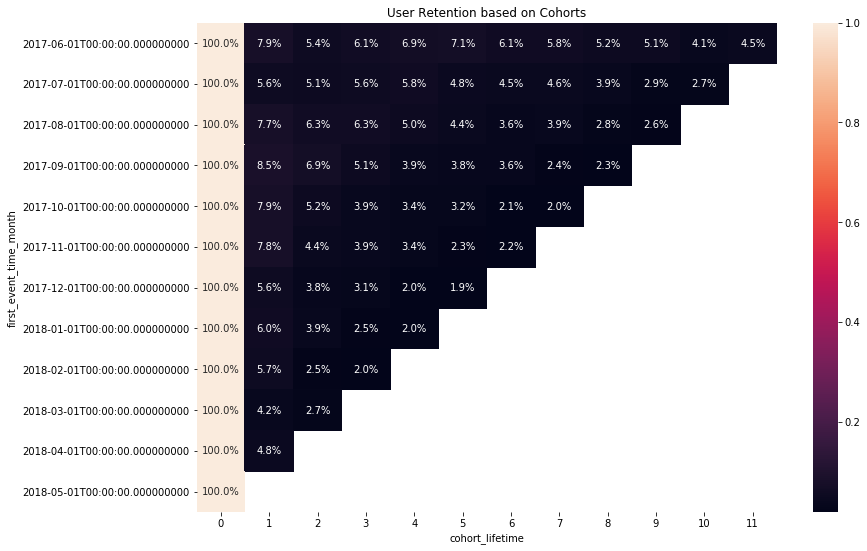

In [65]:
#make a groupby Uid to find first event time
first_visits = visits.groupby('Uid').agg({'Start Ts': 'min'}).reset_index()
first_visits.columns = ['Uid', 'first_event_time']

#getting date, month, and week of first event time
first_visits['first_event_time_week'] = first_visits['first_event_time'].astype('datetime64[W]')
first_visits['first_event_time_month'] = first_visits['first_event_time'].astype('datetime64[M]')
first_visits['first_event_time_date'] = first_visits['first_event_time'].dt.date

#calculating the time between first user session and every following session and
#merging visits with first visits, and calculating cohort lifetime
visits = pd.merge(first_visits, visits, on ='Uid')
visits['cohort_lifetime'] = visits['event_month']-visits['first_event_time_month']
visits['cohort_lifetime'] = (visits['cohort_lifetime']/np.timedelta64(1,'M')).round()
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

#doing a groupby cohort by cohort lifetime, and first event by month
cohorts = visits.groupby(['first_event_time_month', 'cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_event_time_month','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})

#doing another merge with cohorts and initial users count, and making retention pivot
cohorts = cohorts.merge(initial_users_count, on='first_event_time_month')
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_event_time_month', columns='cohort_lifetime', values='retention',aggfunc='sum')

#outputting how many users come back by percentage
print("% of users that come back in the next month: " , retention_pivot[1].mean()*100)
print("% of users that come back at the end of the year: " , retention_pivot[11].mean()*100)

#making a heatmap using sns.heatmap to better output the table
plt.figure(figsize=(13,9))
plt.title('User Retention based on Cohorts')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linecolor='gray'
)

plt.show()

### Conclusion

The % of users that come back in the next month is around 6.52, and the % of users that come back at the end of the year is around 4.5.

Looking at the heatmap, we can see that the retention rate gets considerably lower after each cohort lifetime. The highest retention rate is usually on the first month back. After that, the rates just get lower and lower, many cohorts not recovering. The only cohort that recovered is the first one, which on the 5th month came back from 6.9% to 7.1%. After which, it dipped down.

### How many visits per device?

Text(0, 0.5, 'Number of Devices')

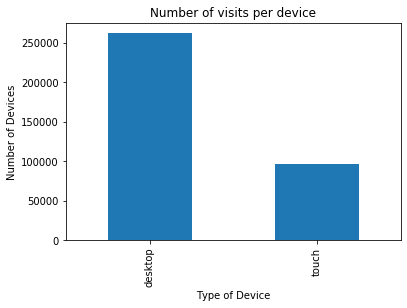

In [66]:
#making a graph to see number of visits per device. Starting with a groupby, then making plots with labels
device_visits = visits.groupby('Device')['Start Ts'].count()

device_visits.plot(kind='bar')
plt.title('Number of visits per device')
plt.xlabel('Type of Device')
plt.ylabel('Number of Devices')

### Conclusion

 From the graph we can see that there are more desktop users than touch users that visit

### How do the visits change over time?

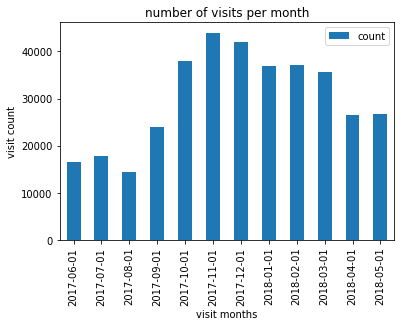

In [67]:
visits_over_time = visits.groupby('event_month')['Uid'].count().reset_index()
visits_over_time = visits_over_time.rename(columns={'Uid':'count'})
visits_over_time['visit_month'] = visits_over_time['event_month'].dt.strftime('%Y-%m-%d')
visits_over_time.plot(x='visit_month', y='count', kind='bar')
plt.title('number of visits per month')
plt.ylabel('visit count')
plt.xlabel('visit months')
plt.show()

### Conclusion

From the graph, we can see that most visits were on months 10 - 12 in 2017

### When do people start buying?

In [70]:
#converting to datetime to prevent future errors
visits['first_event_time_date'] = pd.to_datetime(visits['first_event_time_date'])
orders['order_date'] = pd.to_datetime(orders['Buy Ts'].dt.date)

#finding minimum order date by uid
min_order_datetime = orders.groupby(['Uid'])['order_date'].min()
min_order_datetime.name = 'min_order_datetime'

#merging and finding the month difference
visits_orders = visits.merge(min_order_datetime, on='Uid')
visits_orders['minute_diff'] = (visits_orders['min_order_datetime'] - visits_orders['first_event_time_date'])/ np.timedelta64(1, 'm')


visits_orders.head()

,Uid,first_event_time,first_event_time_week,first_event_time_month,first_event_time_date,Device,End Ts,Source Id,Start Ts,event_date,event_week,event_month,length_of_visits_sec,cohort_lifetime,min_order_datetime,minute_diff
0,313578113262317,2017-09-18 22:49:00,2017-09-14,2017-09-01,2017-09-18,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-11,2018-03-08,2018-03-01,360,6,2018-01-03,154080.0
1,313578113262317,2017-09-18 22:49:00,2017-09-14,2017-09-01,2017-09-18,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080,0,2018-01-03,154080.0
2,313578113262317,2017-09-18 22:49:00,2017-09-14,2017-09-01,2017-09-18,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,2018-02-18,2018-02-15,2018-02-01,540,5,2018-01-03,154080.0
3,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-01,240,0,2017-06-03,0.0
4,1575281904278712,2017-06-03 10:13:00,2017-06-01,2017-06-01,2017-06-03,touch,2017-06-03 17:48:00,10,2017-06-03 17:36:00,2017-06-03,2017-06-01,2017-06-01,720,0,2017-06-03,0.0


Average difference between first visit time and order in minutes: 48547.80048052241

Average difference between visit time and order by minutes cohorts event_month
2017-06-01    62276.119017
2017-07-01    56096.905660
2017-08-01    56232.723214
2017-09-01    48138.510046
2017-10-01    40519.462704
2017-11-01    46324.115630
2017-12-01    41487.945950
2018-01-01    45444.995270
2018-02-01    45749.534860
2018-03-01    50717.976363
2018-04-01    55278.599909
2018-05-01    57017.011737
Name: minute_diff, dtype: float64


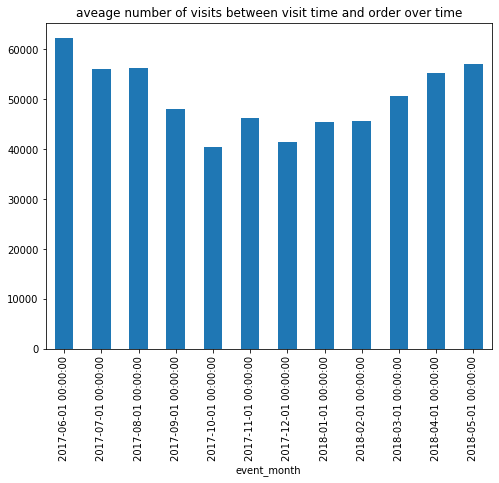

In [77]:
#finding average minutes difference in month
avg_minutes=visits_orders['minute_diff'].mean()
print('Average difference between first visit time and order in minutes:', avg_minutes)

cohort_visit_orders = visits_orders.groupby('event_week')['minute_diff'].mean()
cohort_visit_orders = visits_orders.groupby('event_month')['minute_diff'].mean()
print('\nAverage difference between visit time and order by minutes cohorts', cohort_visit_orders)

cohort_visit_orders.plot(x='event_month', y='minute_diff', figsize=(8,6), kind='bar')
plt.title('aveage number of visits between visit time and order over time')

#plt.ylabel(
plt.show()


### How many orders do they make during a given period of time

In [35]:
#making groupby to find minimum visits by uid and doing proper formatting
min_visits_datetime = visits.groupby(['Uid'])['event_date'].min().reset_index()
min_visits_datetime.name = 'min_visits_datetime'
min_visits_datetime.columns=['Uid','first_visit_date']
min_visits_datetime['first_visit_date'] = pd.to_datetime(min_visits_datetime['first_visit_date'], format='%Y-%m-%d')

min_visits_datetime.info()
min_visits_datetime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 2 columns):
Uid                 228169 non-null uint64
first_visit_date    228169 non-null datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 3.5 MB


,Uid,first_visit_date
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [36]:
#merging min_visits_datetime
orders = orders.merge(min_visits_datetime, on='Uid')
orders['order_visit_diff'] = (orders['order_date'] - orders['first_visit_date'])/ np.timedelta64(1, 'M')
orders_filtered = orders[orders['order_visit_diff']<avg_time]
amount = orders_filtered.groupby(['Uid'])['Buy Ts'].count().mean()
print('Within the given period, users do on average {:.2f} orders'.format(amount))

orders.head()

Within the given period, users do on average 1.38 orders


,Buy Ts,Revenue,Uid,order_date,first_visit_date,order_visit_diff
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0.0


### What is the average purchase size?

In [37]:
avg_size = orders.groupby('Uid')['Revenue'].sum().mean()
print('The average purchase size is {:.3}'.format(avg_size))
orders.head()

The average purchase size is 6.9


,Buy Ts,Revenue,Uid,order_date,first_visit_date,order_visit_diff
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0.0


### How much money do they bring? (LTV)

   first_order_month  n_buyers order_month   Revenue  age       ltv
0         2017-06-01      2023  2017-06-01   9557.49    0  4.724414
1         2017-06-01      2023  2017-07-01    981.82    1  0.485329
2         2017-06-01      2023  2017-08-01    885.34    2  0.437637
3         2017-06-01      2023  2017-09-01   1931.30    3  0.954671
4         2017-06-01      2023  2017-10-01   2068.58    4  1.022531
..               ...       ...         ...       ...  ...       ...
74        2018-03-01      3533  2018-05-01   1114.87    2  0.315559
75        2018-04-01      2276  2018-04-01  10600.69    0  4.657597
76        2018-04-01      2276  2018-05-01   1209.92    1  0.531599
77        2018-05-01      2988  2018-05-01  13925.76    0  4.660562
78        2018-06-01         1  2018-06-01      3.42    0  3.420000

[79 rows x 6 columns]


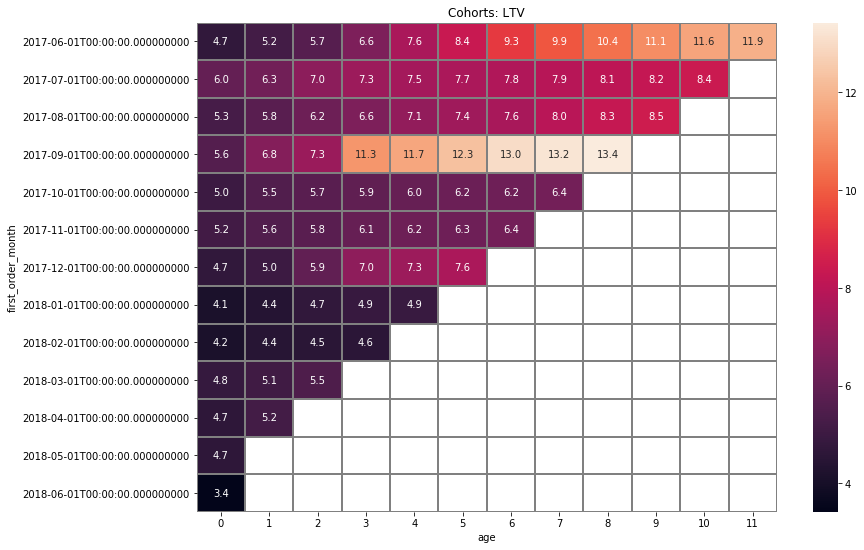

In [38]:
#capturing the months from the dates 
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

#finding the month of each customer's first purchase
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

#calculate number of new customers for each month
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

#adding customers first purchase months to the table of orders
orders_ = pd.merge(orders, first_orders, on='Uid')

#group table of orders by month of first purcahse and month of purchase and sum the revenue
cohorts = orders_.groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()

#add data on how many users made their first purchases in each month to the cohorts table
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

#I need to find gp first in order to find LTV. I will also calculate the cohorts age for the table to look nicer
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#calculating LTV
report['ltv'] = report['Revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(decimals=2)

print(report)

plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(
    output.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray') 
plt.show()


In [39]:
display('How much each cohort lifetime brings', output.mean(axis=0))
display('How much each cohort brings', output.mean(axis=1))

'How much each cohort lifetime brings'

age
0     4.801538
1     0.456364
2     0.406000
3     0.826667
4     0.345000
5     0.334286
6     0.361667
7     0.298000
8     0.295000
9     0.316667
10    0.365000
11    0.260000
dtype: float64

'How much each cohort brings'

first_order_month
2017-06-01    0.990000
2017-07-01    0.763636
2017-08-01    0.847000
2017-09-01    1.492222
2017-10-01    0.795000
2017-11-01    0.911429
2017-12-01    1.275000
2018-01-01    0.986000
2018-02-01    1.147500
2018-03-01    1.820000
2018-04-01    2.595000
2018-05-01    4.660000
2018-06-01    3.420000
dtype: float64

### Conclusion

From the cohorts ltv heatmap, we can see taht the june cohort (top) brings more money after 2018. We also see due to color differences, that the september cohort brings in a lot of money near the new year.

From the cohorts table, we can see that 2018 cohorts start to do a lot better then the 2017 cohorts, especially bringing the most money on average near march through june.

### How much money was spent? (Overall/per source/over time)

In [40]:
#finding how much was spent overall
print(costs['costs'].sum(), 'was spent overall')

329131.62 was spent overall


In [41]:
#finding how much per source
source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
source.columns = ['source_id', 'costs sum']
print('How much was spent per source id')
source

How much was spent per source id


,source_id,costs sum
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [42]:
#finding how much per month
monthly_cost = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
monthly_cost.columns = ['month', 'costs sum']
print('How much was spent per month')
monthly_cost

How much was spent per month


,month,costs sum
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


### Conclusions

From calculating the sum of costs, I was able to find that 329131.62 was spent overall.

From all the Source Ids shown, Source Id 3 cost the most.

The final table shows that the months of October, November, and December of 2017 cost the most.

### How much did customer acquisition from each of the sources cost?, and How worthwhile were the investments? (ROI)

In [43]:
#making a groupby for costs so we can just have source id and the sum of costs for each
monthly_costs = costs.groupby(['source_id'])['costs'].sum().reset_index()
monthly_costs.columns=['Source Id', 'costs_per_source_id']
monthly_costs

,Source Id,costs_per_source_id
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [44]:
#making a groupby for visits by uid and source id, and merging with orders.
# Sort visits by "Source Id" before it's used
visits = visits.sort_values(by=['Source Id'], ascending=[1])

id_source = visits[['Uid', 'Source Id']].groupby('Uid')['Source Id'].first()
orders = orders.merge(id_source, how='inner', on='Uid')

orders.sort_values(by=['Uid', 'Revenue'], ascending=[1,0])

orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 8 columns):
Buy Ts              50415 non-null datetime64[ns]
Revenue             50415 non-null float64
Uid                 50415 non-null uint64
order_date          50415 non-null datetime64[ns]
first_visit_date    50415 non-null datetime64[ns]
order_visit_diff    50415 non-null float64
order_month         50415 non-null datetime64[ns]
Source Id           50415 non-null int64
dtypes: datetime64[ns](4), float64(2), int64(1), uint64(1)
memory usage: 3.5 MB


,Buy Ts,Revenue,Uid,order_date,first_visit_date,order_visit_diff,order_month,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0.0,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0.0,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0.0,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0.0,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0.0,2017-06-01,3


In [62]:
#making two different groupbys for revenue per source id and buyers per source id, and merging everything to a new report table
revenue = orders.groupby('Source Id')['Revenue'].sum().reset_index()
buyers = orders.groupby('Source Id').agg({'Uid':'nunique'}).reset_index()

#merging everything together
report2 = revenue.merge(buyers, on='Source Id')
report2 = report2.merge(monthly_costs, on='Source Id')

#calculating LTV, CAC, and ROI
report2['ltv'] = report2['Revenue']/report2['Uid']
report2['cac'] = report2['costs_per_source_id']/report2['Uid']
report2['roi'] = report2['ltv']/report2['cac']

report2.info()
report2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 7 columns):
Source Id              7 non-null int64
Revenue                7 non-null float64
Uid                    7 non-null int64
costs_per_source_id    7 non-null float64
ltv                    7 non-null float64
cac                    7 non-null float64
roi                    7 non-null float64
dtypes: float64(5), int64(2)
memory usage: 448.0 bytes


,Source Id,Revenue,Uid,costs_per_source_id,ltv,cac,roi
0,1,38560.06,3743,20833.27,10.301913,5.565928,1.850889
1,2,65152.26,4323,42806.04,15.071076,9.901929,1.522034
2,3,44317.68,9138,141321.63,4.849823,15.465269,0.313594
3,4,52479.75,9823,61073.60,5.342538,6.217408,0.859287
4,5,40357.91,6839,51757.10,5.901142,7.567934,0.779756


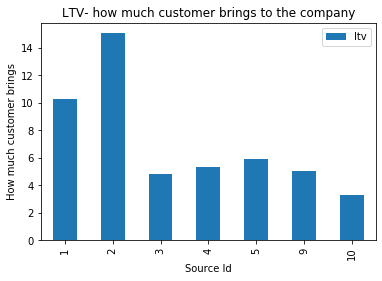

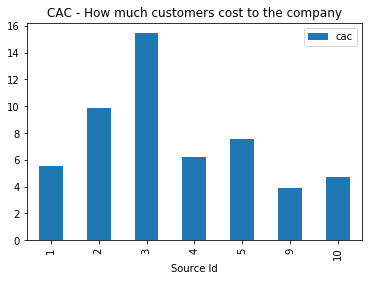

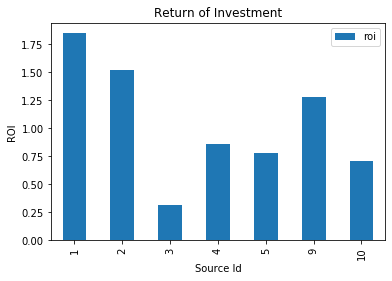

In [63]:
#plotting the graphs for LTV, CAC, and ROI.
report2.plot(x='Source Id', y='ltv', kind='bar')
plt.title('LTV- how much customer brings to the company')
plt.ylabel('How much customer brings')
plt.show()

report2.plot(x='Source Id', y='cac' , kind='bar')
plt.title('CAC - How much customers cost to the company')
plt.ylabel('How much it costs')
plt.ylabel('')

report2.plot(x='Source Id', y='roi' , kind='bar')
plt.title('Return of Investment')
plt.ylabel('ROI')
plt.show()

### Conclusion

The LTV graph shows how much customers buy from each Source Id, and it shows that Source Id 1 and 2 bring the most money for the company.

The CAC graph shows how much customers cost from each Source Id, Source Id 3 being the most expensive while Souce Id 9 being the least.

The ROI graph shows how worthwhile the investment is, and it clearly shows that Source Id 1 and 2 are the best, while 3 isn't worthwhile 

From these graphs, we can clearly see that Source Id costs the most for each customer, and does NOT pay off in the long run. It's better to invest in Source Id 1 and 2 due to the low CAC and high LTV value while having the highest ROI. Source Id 9 may also be worth considering due to also having a high ROI and low CAC.

# Step 3 

Conclusion: advise marketing experts how much money to invest and where.

What sources and platforms are recommended?

Device
desktop    6.447894e+06
touch      5.143134e+05
Name: Revenue, dtype: float64


Text(0, 0.5, 'Number of Devices')

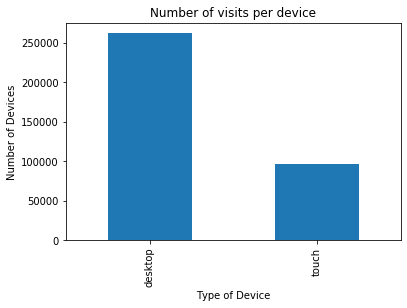

In [64]:
revenue_orders = visits.merge(orders, on='Uid')
revenue_orders = revenue_orders.groupby('Device')['Revenue'].sum()
print(revenue_orders)

device_visits.plot(kind='bar')
plt.title('Number of visits per device')
plt.xlabel('Type of Device')
plt.ylabel('Number of Devices')

As we can see with the graph, most visits come from Desktop. Therefore it would be smart to invest into the desktop platform. This can be further proven with revenue table, which shows that desktop is more profitable compared to touch.

However, even though desktop is more profitable, it doesn't mean to neglect touch devices either. They still bring in a lot of money compared to desktop, even though the amount of visits is a lot lower.

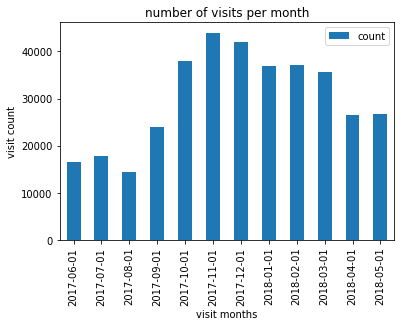

In [65]:
visits_over_time.plot(x='visit_month', y='count', kind='bar')
plt.title('number of visits per month')
plt.ylabel('visit count')
plt.xlabel('visit months')
plt.show()

From this table, we can also see that a lot of the visits came from October, November, and December. I suggest it's better to invest more into ads in these months.

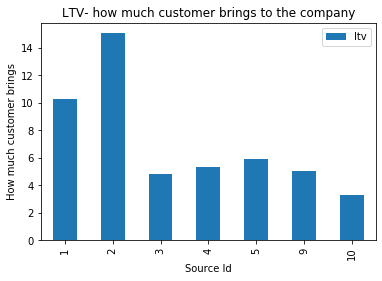

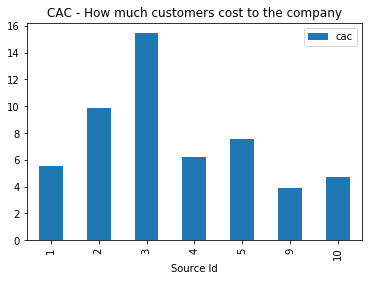

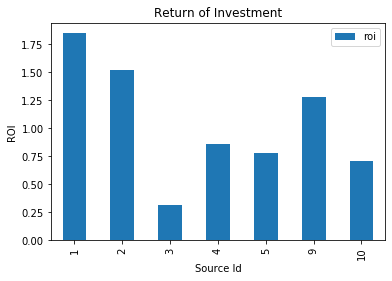

In [66]:
report2.plot(x='Source Id', y='ltv', kind='bar')
plt.title('LTV- how much customer brings to the company')
plt.ylabel('How much customer brings')
plt.show()

report2.plot(x='Source Id', y='cac' , kind='bar')
plt.title('CAC - How much customers cost to the company')
plt.ylabel('How much it costs')
plt.ylabel('')

report2.plot(x='Source Id', y='roi' , kind='bar')
plt.title('Return of Investment')
plt.ylabel('ROI')
plt.show()

From the LTV graph, we can see how many customers buy from each source id. Comparing it with the Return of Investment graph, we can clearly see that Source Id 1 and 2 are completely worth the money. Source Id 9, while not bringing as much money as 1 and 2, still has a high ROI making it worth the money to invest in.

Comparitively, Source Id 3 should not be as invested as it is right now. It costs too much to acquire customers as seen in the CAC graph, and the amount of money that the customer brings to the company is very low as seen in the LTV graph. Compared to all the other Source Ids, Source Id 3 has by far the lowest ROI.